<a href="https://colab.research.google.com/github/jp-data/Portf-lio---Data-Science/blob/master/Previd%C3%AAncia_social_brasileira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Em 2019 fomos testemunhas da instabilidade social e política gerada pela reforma da previdência. Vimos um país dividido. As parcelas da sociedade  favoráveis a reforma tinham como argumentos:**

*- O equilíbrio das contas públicas.*

*- A extinção de privilégios para os contribuintes mais ricos.*

*- A insustentabilidade do sistema vigente no longo prazo, visto que o país o país está envelhecendo, o que prejudicaria as gerações futuras de aposentados.*

**Já as parcelas da sociedade que se opuseram tinham como argumentos:**

*- A injustiça que a reforma causaria para as pessoas com baixa expectativa de vida, uma vez que a proposta principal seria uma idade mínima para o contribuinte se aposentar.*

*- Um problema envolvendo a desigualdade gênero. Porque levando em consideração que há estimativas de que as mulheres que trabalham fora dedicam em média 8 horas a mais que os homens em tarefas domésticas, seria injusto aumentar a idade mínima para mulheres se aposentarem.*

*- Outro problema está relacionado ao aumento das desigualdades, visto que a nova proposta implementa o cálculo do valor da aposentadoria como sendo a média de todas as contribuições realizadas pelo trabalhador ao longo do seu tempo de contribuição, ante a antiga regra de que o valor era calculado segundo os 80% maiores valores de contribuição do trabalhador.*

**Optou-se pela reforma. Os argumentos contra foram considerados, mas o fato é que os argumentos pró tiveram mais força, e devido a que ? Principalmente aos dados. Os dados mostram que os problemas elencados pelos setores que propuseram a reforma estão presentes e vêem se formulando há anos. E é também há anos que os dados mostram que esses problemas teriam de ser enfrentados no futuro. E Hoje nosso sistema previdenciário, com a reforma, se constitui basicamente pelas seguintes regras:**

*- Não existe mais a possibilidade de se aposentar por tempo de contribuição sem atingir uma idade mínima. Ou seja, a nova regra, de modo geral, engloba idade e tempo de contribuição, e os anos mínimos diferenciam-se para trabalhadores rurais, trabalhadores urbanos, professores, policiais e trabalhadores do setor público federal, além de diferenciarem-se também por sexo -  trabalhadores do setor publico na escala municipal e estadual não fizeram parte da reforma.*


**O presente trabalho, portanto, tem o objetivo de mostrar os dados por trás dos argumentos que levaram a reforma, ao mesmo tempo que responde questões como: quanto gastamos com despesas previdenciarias ao longo do tempo ? o que isso ocasionou aos indicadores de saúde financeira do Estado? e quais são os efeitos disso ?** 











In [1]:
#importando as principais bibliotecas para manipular e visualizar os dados
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
#lendo o arquivo, que está em formato xlsx
df =pd.read_excel('/content/contas publicas governo central.xlsx')
df.head(25)

,Ano,Receita Liquida,Despesa Primaria total,despesa c/ previdência,despesa com pessoal,outras despesas obrigatórias,Despesas do poder executivo
0,1997,1.347688e+05,1.329680e+05,47050.464153,40132.129791,8595.925031,37189.482548
1,1998,1.563599e+05,1.487829e+05,53375.650473,44664.708184,8926.209861,41816.310023
2,1999,1.788441e+05,1.586798e+05,58540.022973,48261.258802,13525.426667,38353.100958
3,2000,1.983543e+05,1.773721e+05,65787.079642,54515.738617,14139.192713,42930.051536
4,2001,2.273803e+05,2.056432e+05,75328.106397,63217.923770,16170.549903,50926.599396
5,2002,2.680383e+05,2.364611e+05,88026.658967,71856.275922,17342.402238,59235.730302
6,2003,2.992024e+05,2.601224e+05,107134.805245,76617.995299,22378.876945,53990.718284
7,2004,3.549521e+05,3.056107e+05,125750.764271,84594.613425,26566.853625,68698.427150
8,2005,4.075985e+05,3.549254e+05,146010.129515,93206.931234,39241.595739,76466.722150
9,2006,4.524866e+05,4.037384e+05,165585.299855,106634.300719,46120.938438,85397.852791


**O Data set traz alguns dados referentes as contas públicas do governo ao longo dos anos. A série se inicia em 1997 e finaliza em 2019. Os valores são correntes e estão em bilhões de reais**

**Ano:** ano da observação

**Receita Liquida:** receita bruta do governo central descontada das transferências obrigatórias.

**Despesa Primária Total:** são as despesas não financeiras, aquelas realizadas para pagar salários, pensões, obras públicas e as aposentadorias. 

**Despesa c/ previdência:** despesas com previdência, incluidas nas despesas obrigatórias do orçamento público.

**Despesas c/ pessoal:** despesas primárias de salários a trabalhadores e prestadores de serviço do setor público.

**Outras despesas obrigatórias:** uma série de despesas obrigatórias, incluindo a reserva de contingência, doações e o fundo para financiamento de campanhas eleitorais. 

**Despesas do poder executivo:** inclui despesas obrigatórias e discricionárias, ligadas principalmente aos programas criados pelo poder executivo ao longo dos anos.

In [12]:
#conhecendo o formato dos dados
df.dtypes

Ano                               int64
Receita Liquida                 float64
Despesa Primaria total          float64
despesa c/ previdência          float64
despesa com pessoal             float64
outras despesas obrigatórias    float64
Despesas do poder executivo     float64
dtype: object

**Nota: as colunas do Dataset estão nomeadas com espaços, o que pode atrapalhar as iterações necessárias do trabalho, temos que substituir os espaços pelo caractere '_'.**

In [13]:
#renomeando as colunas
df.columns=['Ano','Receita_liquida','Despesa_primaria_total','Despesa_previdencia','Despesa_pessoal','Outras_despesas_obrigatorias','Despesas_poder_executivo']
#visualizando a alteração
df.head(21)

,Ano,Receita_liquida,Despesa_primaria_total,Despesa_previdencia,Despesa_pessoal,Outras_despesas_obrigatorias,Despesas_poder_executivo
0,1997,1.347688e+05,1.329680e+05,47050.464153,40132.129791,8595.925031,37189.482548
1,1998,1.563599e+05,1.487829e+05,53375.650473,44664.708184,8926.209861,41816.310023
2,1999,1.788441e+05,1.586798e+05,58540.022973,48261.258802,13525.426667,38353.100958
3,2000,1.983543e+05,1.773721e+05,65787.079642,54515.738617,14139.192713,42930.051536
4,2001,2.273803e+05,2.056432e+05,75328.106397,63217.923770,16170.549903,50926.599396
5,2002,2.680383e+05,2.364611e+05,88026.658967,71856.275922,17342.402238,59235.730302
6,2003,2.992024e+05,2.601224e+05,107134.805245,76617.995299,22378.876945,53990.718284
7,2004,3.549521e+05,3.056107e+05,125750.764271,84594.613425,26566.853625,68698.427150
8,2005,4.075985e+05,3.549254e+05,146010.129515,93206.931234,39241.595739,76466.722150
9,2006,4.524866e+05,4.037384e+05,165585.299855,106634.300719,46120.938438,85397.852791


**No código abaixo podemos ver os valores 'visuais' no Dataset e como eles realmente são em valores monetários. Vamos fazer isso com as despesas previdênciarias, foco do trabalho.**

In [16]:
#utilizando um metodo extraido do módulo babel numbers para formatar números 
#e visualiza-los em moedas locais com o método locale
from babel.numbers import format_decimal, format_number
import locale

#criando um dataframe vazio que contem somente o cabeçalho, 
#uma coluna para os valores visuais e uma coluna para os valores monetários
dados=pd.DataFrame(columns=['valor_visual','valor_monetário'])

#adicionando os valores não monetários a coluna 'valor_visual' multiplicados por 1milhão, 
#de modo a verificarmos os valores monetários em bilhões.
dados.valor_visual=df.Despesa_previdencia*1000000

#adicionando a coluna de valores monetarios os dados visuais devidamente tratado no formato monetário.
dados.valor_monetário=dados['valor_visual'].apply(format_number,locale='pt_BR')

#visualizando o dataframe
dados.head(25)

,valor_visual,valor_monetário
0,4.705046e+10,"47.050.464.152,651"
1,5.337565e+10,"53.375.650.473,096"
2,5.854002e+10,58.540.022.973
3,6.578708e+10,"65.787.079.641,69"
4,7.532811e+10,"75.328.106.397,25"
5,8.802666e+10,"88.026.658.966,77"
6,1.071348e+11,"107.134.805.244,63"
7,1.257508e+11,"125.750.764.270,89"
8,1.460101e+11,"146.010.129.515,15"
9,1.655853e+11,"165.585.299.854,89"


#Deflacionando a série e organizando a primeira visualização gráfica. 

**Como dito, este dataset se refere a valores nominais, ou seja, não foram deflacionados de acordo com os preços presentes da economia brasileira. Portanto, vamos deflacionar esses dados nominais e visualizarmos a trajetória dos gastos com previdência em valores reais, trazidos de acordo com o indice de preços da economia em 2019.**


*Deflacionando a série.*

*O primeiro passo é ler o arquivo referente aos indices de preço acumulado da economia em cada ano de observação.*

*Optou-se pelo Indice Nacional de Preços, o indice mais popular ao tratarmos de correção monetária pelo fato de medir a inflação média da cesta do consumidor brasileiro urbano.*



In [17]:
#Primeiro passo: carregar o dataset que traz os indices nacionais de preços em todos os anos da série. 
#lendo o arquivo
df_inpc=pd.read_csv('/content/INPC.csv', names= ['periodo','INPC_acumulado'], delimiter= ';')
df_inpc

,periodo,INPC_acumulado
0,Variação acumulada no ano durante o Plano Real,NaN
1,,Brasil
2,dezembro 1995,21.98
3,dezembro 1996,9.12
4,dezembro 1997,4.34
5,dezembro 1998,2.49
6,dezembro 1999,8.43
7,dezembro 2000,5.27
8,dezembro 2001,9.44
9,dezembro 2002,14.74


In [18]:
#apagando as linhas desnecessárias
df_inpc=df_inpc.drop([0,1,2,3,27],axis=0)

#substituindo os espaços na coluna 'periodo' por um caractere, de forma a não atrapalhar as iterações necessárias. 
df_inpc.periodo=df_inpc.periodo.str.replace(' ','_')

#alterando o indexador para não atrapalhar as iterações entre os dataframes ao criarmos os valores reais.
index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
df_inpc.index=index

In [19]:
#conhecendo o formato dos dados
df_inpc.dtypes

periodo           object
INPC_acumulado    object
dtype: object

In [20]:
#tranformando o índice nacional de preços em um uma série de números flutuantes
df_inpc.INPC_acumulado=df_inpc.INPC_acumulado.astype(float)

#visualizando os dados
df_inpc.head(25)

,periodo,INPC_acumulado
0,dezembro_1997,4.34
1,dezembro_1998,2.49
2,dezembro_1999,8.43
3,dezembro_2000,5.27
4,dezembro_2001,9.44
5,dezembro_2002,14.74
6,dezembro_2003,10.38
7,dezembro_2004,6.13
8,dezembro_2005,5.05
9,dezembro_2006,2.81


**Este é o nosso dataframe; traz o Indice Nacional de Preços ao Consumidor acumulado de cada ano e fará parte do cálculo para deflação.**

*Deflacionando a série.*

*O segundo passo é criar um dataframe com os valores reais.*

*Para tanto vamos seguir os seguintes passos:*

*- O primeiro passo é criar um dataframe somente com o cabeçalho, que irá conter alem dos periodos de observação e os dados nominais uma coluna chamada 'base'.*

*- O segundo passo é adicionar a coluna base os dados que são conhecidos como base de correção monetária, usado no cálculo para deflacionar os dados. O dado é resultado do INPC em questão dividido por 100, somado com 1 e multiplicado por 100.* 

*- O terceiro passo é criar os valores reais em cada coluna, que é o resultado do produto entre o valor nominal e a base de correção monetária do ano em que pretende-se trazer o valor, criada anteriormente - e em nosso caso a base de correção monetária do ano de 2019 -, dividido pela base de correção monetária do ano do valor do dado nominal.*

In [21]:
#criando um dataframe vazio, somente com o cabeçalho. 
df_valores_reais=pd.DataFrame(columns=['Ano','base','Receita_liquida','Despesa_primaria','Despesa_previdencia','Despesa_pessoal',
                                       'Outras_despesas_obrigatorias','Despesas_poder_executivo'])
#adicionando os dados na coluna ano 
df_valores_reais.Ano=list(df.Ano)

#criando a base de correção monetária para cada ano
df_valores_reais['base']=(1+(df_inpc.INPC_acumulado/100))*100

#para cada dado monetário teremos o seu valor real, dado pelo divisão do produto entre o valor monetário nominal e a 
#base de correção monetária do ano de 2019 pela base de correção monetária do ano do valor nominal a ser tranformado. 
df_valores_reais.Receita_liquida=(df.Receita_liquida*df_valores_reais.base[22])/df_valores_reais.base

df_valores_reais.Despesa_primaria=(df.Despesa_primaria_total*df_valores_reais.base[22])/df_valores_reais.base

df_valores_reais.Despesa_previdencia=(df.Despesa_previdencia*df_valores_reais.base[22])/df_valores_reais.base

df_valores_reais.Despesa_pessoal=(df.Despesa_pessoal*df_valores_reais.base[22])/df_valores_reais.base

df_valores_reais.Outras_despesas_obrigatorias=(df.Outras_despesas_obrigatorias*df_valores_reais.base[22])/df_valores_reais.base

df_valores_reais.Despesas_poder_executivo=(df.Despesas_poder_executivo*df_valores_reais.base[22])/df_valores_reais.base

#Plotando o gráfico que mostrará a trajetória dos gastos com previdência.

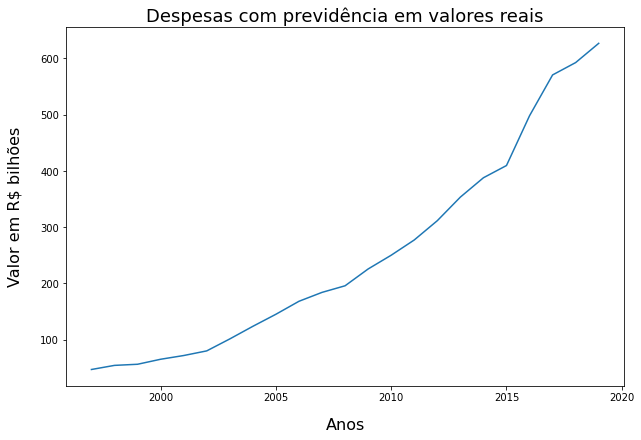

In [23]:
#criando uma função que sera aplicada no eixo Y do gráfico, arredondando os dados sobre os gastos com previdência.
  #É conveniente dividir os valores por 1000 por conta da posição em que os pontos foram alocados nos dados 
    #flutuantes da coluna de despesa com previdência.
      #Desse modo alocaremos o ponto para o local correto em termos monetários.


def divisor(x):
  return(x/1000)

x=df_valores_reais.Ano
y=df_valores_reais.Despesa_previdencia.apply(divisor)
figura=plt.figure(figsize=(10,6.6))
figura=plt.plot(x, y)
plt.xlabel('Anos', fontsize=16, labelpad= 15)
plt.ylabel('Valor em R$ bilhões', fontsize=16, labelpad= 18)
plt.title('Despesas com previdência em valores reais', fontsize=18)
plt.show()

**A curva é ascendente. A partir do ano de 2003, o montante de recursos necessários para cobrir as aposentadorias ultrapassam R$ 100 bilhões de reais anuais, atingindo no ano de 2019 uma demanda de recursos arrecadados de mais de RS 600  bilhões de reais em valores presentes. Reparem como a curva vai se tornando mais inclinada durante a sua tendência de elevação; isso significa um crescimento cada vez mais acelerado destes gastos. Resultado? ocasiona uma forte pressão orçamentária para cobrir somente esse tipo de despesa.** 

**Também podemos comparar os gastos com previdência com os gastos do governo em despesas primárias, pois as despesas previdenciárias é um tipo de despesa primária do orçamento público e também aquela que hoje soma a maior fatia de gastos desse orçamento primário, juntamente com as despesas de pessoal (salários e beneficios do setor público - este trabalho também mostrará isso.** 

**No código abaixo plotaremos um gráfico multilinhas e observaremos a trajetória dos dois gastos.**

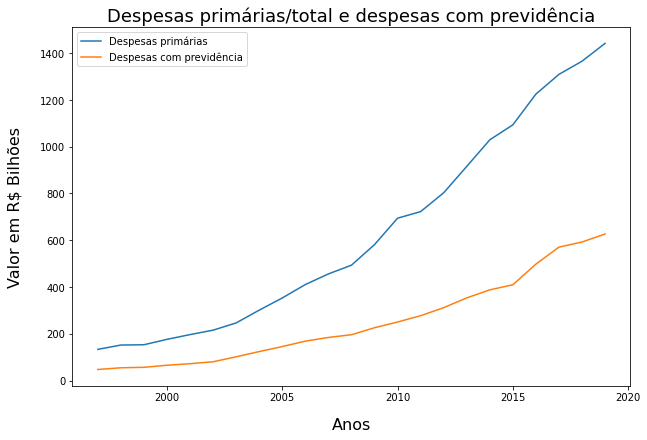

In [24]:
#determinação do eixo X
x=df.Ano

#determinação dos eixos y; é um gráfico multilinhas
y1=df_valores_reais.Despesa_primaria.apply(divisor)
y2=df_valores_reais.Despesa_previdencia.apply(divisor)

#plotando a imagem com todas as suas formatações, utilizando a bilbioteca matplotlib
figura=plt.figure(figsize=(10,6.6))
figura=plt.plot(x,y1,label='Despesas primárias')
figura=plt.plot(x,y2,label='Despesas com previdência')
plt.xlabel('Anos',fontsize=16, labelpad= 15)
plt.ylabel('Valor em R$ Bilhões',fontsize=16, labelpad= 18)
plt.title('Despesas primárias/total e despesas com previdência', fontsize=18)

plt.legend()
plt.show()

**As despesas primárias também crescem rapidamente. Lembrando que ela inclui os gastos com previdência, os gastos com salários e beneficios de trabalhadores do setor público, despesas com saúde, educação e segurança, entre outros, gastos estes que também se elevaram ao longo do tempo devido as novas demandas da sociedade por esses serviços.**

**Mas voce deve estar se perguntando: e as receitas ? de alguma forma isso fora financiado, de alguma forma chegamos até aqui...**

**Bom, é ai que as coisas azedam. No código abaixo vamos plotar um gráfico que mostrará receitas liquidas e despesas primárias e** -spoiller- **verificar que em determinado momento começamos a registrar deficits primários nas finanças públicas.**

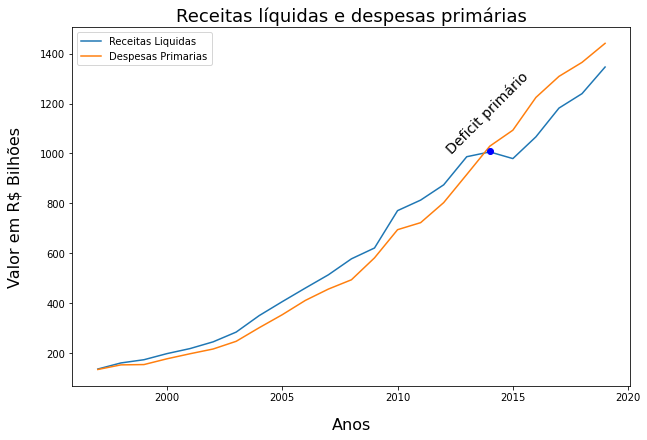

In [25]:
#definindo o eixo X
x=df.Ano

#definindo os eixos y's
y1=df_valores_reais.Receita_liquida.apply(divisor)
y3=df_valores_reais.Despesa_primaria.apply(divisor)

#plotando ográfico com a biblioteca matiplotlib
figura= plt.figure(figsize=(10,6.6), facecolor= "white")
figura=plt.plot(x,y1,label='Receitas Liquidas')
figura=plt.plot(x,y3,label='Despesas Primarias')

plt.xlabel('Anos',fontsize=16, labelpad= 15)
plt.ylabel('Valor em R$ Bilhões',fontsize=16, labelpad= 18)
plt.title('Receitas líquidas e despesas primárias', fontsize=18)
plt.plot(2014, 1010, 'bo' )
t=plt.text(2012, 1000, "Deficit primário", rotation= 45, size=14)
plt.legend()
plt.show()


Como vemos, em meados de 2014 passamos a registrar deficits primários no orçamento, ou seja, passamos a não suportar os gastos correntes com nossos recursos oriundos de arrecadação corrente (impostos, tributos). Lembra-se do gráfico anterior ? Esse déficit ocorre justamente em meados do ano em que a reta que traz os gastos com previdência se tornou mais inclinada (elevação mais acelerada dos gastos). Verifica-se também uma queda nas receitas liquidas a partir desse ano.

E porque isso é azedo ?

Porque quando isso acontece o poder público pode recorrer, basicamente, a uma dessas opções:

 - Aumento da carga tributária (de forma a aumentar as receitas).
 - Emissão de títulos no mercado financeiro (tomar recursos emprestados com a promessa de pagamento no futuro, o que vai depender da atual taxa de juros, que tradicionalmente é mais utilizada como ferramenta de politica monetária).
 - Reformas fiscais e/ou diminuição dos gastos governamentais.
 - Reformar o sistema previdenciário, visto que é um gasto que ira continuar aumentando devido, entre outros fatores, ao aumento do numero de novos aposentados no país. 

DIante desse cenário, o que você faria ?

Aumento da carga tributária...Ok! Não! Espera! Aumento da carga tributária? no Brasil ? sério ?

Emitir títulos...ok! basicamente, se endividar para pagar dívidas! Bom, sabemos onde isso vai dar, certo ?! No começo você pode até conseguir arrecadar fundos de fontes financeiras para pagar suas dívidas, mas essas dívidas vão se acumular expressivamente, visto que estamos lidando com despesas que não vão diminuir sozinhas! Ao final, ninguém mais vai te emprestar recursos. E porque ? faça a pergunta a você mesmo: você emprestaria dinheiro para quem tem mais probabilidade de te pagar ou para quem tem mais probabilidade de te dar um calote ? Pois é, no final das contas você teria um país sem confiança e extremamente endividado batendo a porta do FMI.

Corte de gastos... hum...é uma opção viável; mas depende do contexto - e economista adora usar esse verbo! O fato é que já estamos fazendo isso com a pec do teto dos gastos públicos, lembra-se? e devido ao nosso contexto, a reforma por si só não da conta de eqiuilibrar o orçamento; sim, isso mesmo...mesmo ela sendo essa coisa malvada que nos arranca metade do minímo de dignidade que ainda temos, sozinha ela não segura!

Reforma do sistema previdenciário... até que enfim, hein ?! Sabe desde quando discutimos essa reforma ? Sei la, eu nem era nascido. Mas faz um bom tempo. E justamente por isso que ela se tornou tão polemica e de certa forma tão dolorosa: porque nunca saimos da discussão, nunca reformamos o sistema pouco a pouco, de forma a se tornar menos doloroso. Então, quando o problema de fato apareceu, é como se nos sentissemos enganados por uma coisa que inventaram para fazer a gente trabalhar mais. 

A falta de coragem dos nossos políticos em nos alertarem do problema gerou coisas como videos no youtube intitulados de: "não existe déficit da previdência, entenda o porque". 

Antes fosse. O problema sempre existiu. É só olhar os dados (e os gráficos).

No código abaixo vamos plotar um gráfico que mostrará a porcentagem da participação dessas despesas com previdencia no total de despesas primárias e nas receitas liquidas do governo.

In [26]:
#O primeiro passo é criar um dataframe que irá conter esses dados. 
#criando um dataframe com tres colunas, a 1º para o periodo e as outras duas para a % dos gastos nas receitas liquidas e nas despesas primarias.
previdencia_em_porcentagem= pd.DataFrame(columns=['ano','na_receita_liquida','na_despesa_primaria']) #nota: os dados utilizados são retirados do dataframe que contêm
                                                                                                  #os dados em valores reais.

#A coluna receita_liquida irá conter o quanto os gastos previdenciarios representam no total das receitas liquidas , em porcentagem.
#É a simples divisão da despesa pela receita liquida. Com o metodo apply cortamos em tres casas decimais o numero resultante
previdencia_em_porcentagem.na_receita_liquida= (df_valores_reais.Despesa_previdencia/ df_valores_reais.Receita_liquida).apply(format_decimal)

#A coluna 'despesa_primaria' ira conter o quanto que as despesas previdenciarias representam na despesa primária, em porcentagem.
#É a simples divisão da despesa pela receita liquida. Com o metodo apply também aplicado para cortamos em três casas decimais o valor resultante.  
previdencia_em_porcentagem.na_despesa_primaria= (df_valores_reais.Despesa_previdencia/ df_valores_reais.Despesa_primaria).apply(format_decimal)

#A coluna 'ano' recebe os anos de observação
previdencia_em_porcentagem.ano= df_valores_reais.Ano
previdencia_em_porcentagem.head()

,ano,na_receita_liquida,na_despesa_primaria
0,1997,0.349,0.354
1,1998,0.341,0.359
2,1999,0.327,0.369
3,2000,0.332,0.371
4,2001,0.331,0.366


In [27]:
#conhecendo o formato dos dados gerados
previdencia_em_porcentagem.dtypes

ano                     int64
na_receita_liquida     object
na_despesa_primaria    object
dtype: object

In [28]:
#tranformando os dados em séries de flutuantes para simplificar a projeção do gráfico. 
previdencia_em_porcentagem.na_receita_liquida= previdencia_em_porcentagem.na_receita_liquida.astype(float)
previdencia_em_porcentagem.na_despesa_primaria= previdencia_em_porcentagem.na_despesa_primaria.astype(float)

**O gráfico.**

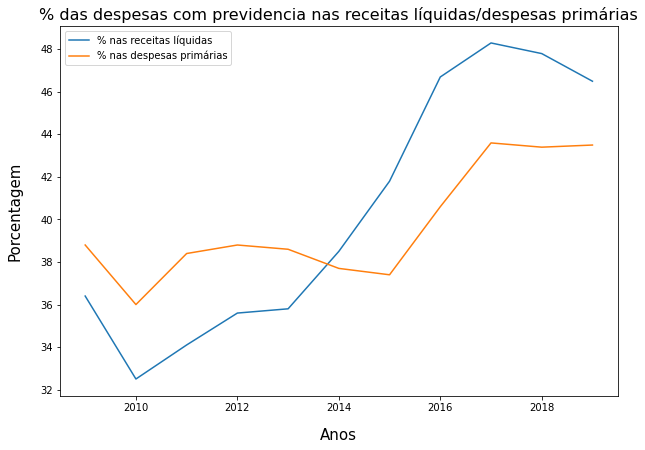

In [29]:
#determinação do eixo X: os anos de observação
x= previdencia_em_porcentagem.ano[12:23]

                        #determinação dos eixos y's; 
#o primeiro recebe a despesa previdenciaria no montante da receita liquida, em porcentagem.
y1= (previdencia_em_porcentagem.na_receita_liquida[12:23])*100

#o segundo recebe a despesa previdenciaria no montante das despesas primárias, em porcentagem.
y2= (previdencia_em_porcentagem.na_despesa_primaria[12:23])*100

                          #plotando o gráfico
#escolhendo o tamnho do gráfico                  
figura= plt.figure(figsize=(10,6.8))
#plotando a primeira linha, com a trajetória dos dados a respeito da % das despesas previdenciarias no montante as receitas liquidas.
figura= plt.plot(x, y1, label= '% nas receitas líquidas')
#plotando a segunda linha, com a trajetória dos dados a respeito da % das despesas previdenciárias no montante das despesas primárias. 
figura= plt.plot(x, y2, label= '% nas despesas primárias')

plt.xlabel('Anos', fontsize= 15, labelpad= 15)
plt.ylabel('Porcentagem', fontsize= 15, labelpad= 18)


plt.title('% das despesas com previdencia nas receitas líquidas/despesas primárias', fontsize= 16)
plt.legend()
plt.show()


**Se incluirmos os gastos com pessoal e encargos especiais, que é um outro tipo de despesa que tem crescido bastante no Brasil, vemos que essas depesas consomem mais da metade do orçamento.**

In [30]:
#criando um Dataframe com as colunas ano, receita liquida e despesa primaria.
gastos_c_previdencia_pessoal_porcentagem= pd.DataFrame(columns=['ano','na_receita_liquida','na_despesa_primaria'])

#A coluna receita_liquida irá conter o quanto os gastos previdenciarios e com pessoal/encargos 
#representam no total das receitas liquidas , em porcentagem.
#É a simples divisão da soma das duas despesas pela receita liquida. Com o metodo apply cortamos em tres casas decimais o numero resultante
gastos_c_previdencia_pessoal_porcentagem.na_receita_liquida= ((df_valores_reais.Despesa_previdencia + df_valores_reais.Despesa_pessoal)/
                                                  df_valores_reais.Receita_liquida).apply(format_decimal)

#A coluna despesa_primaria ira conter o quanto que as despesas previdenciarias e com pessoas/encargos 
#representam na despesa primária, em porcentagem. 
gastos_c_previdencia_pessoal_porcentagem.na_despesa_primaria= ((df_valores_reais.Despesa_previdencia + df_valores_reais.Despesa_pessoal)/
                                                   df_valores_reais.Despesa_primaria).apply(format_decimal)

#a coluna ano recebe os anos de observação
gastos_c_previdencia_pessoal_porcentagem.ano= df_valores_reais.Ano

In [31]:
gastos_c_previdencia_pessoal_porcentagem.head()

,ano,na_receita_liquida,na_despesa_primaria
0,1997,0.647,0.656
1,1998,0.627,0.659
2,1999,0.597,0.673
3,2000,0.607,0.678
4,2001,0.609,0.674


In [32]:

gastos_c_previdencia_pessoal_porcentagem.receita_liquida= gastos_c_previdencia_pessoal_porcentagem.na_receita_liquida.astype(float)
gastos_c_previdencia_pessoal_porcentagem.despesa_primaria= gastos_c_previdencia_pessoal_porcentagem.na_despesa_primaria.astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
x= previdencia_pessoal_porcentagem.ano[12:23]
y1= (previdencia_pessoal_porcentagem.receita_liquida[12:23])*100
y2= (previdencia_pessoal_porcentagem.despesa_primaria[12:23])*100

figura= plt.figure(figsize=(10,6.8))
figura= plt.plot(x, y1, label= 'Participação na receita liquida')
figura= plt.plot(x, y2, label= 'Participação na despesa primária')

plt.title('% das despesas com previdência e com pessoal nas receitas liquidas e nas despesas primárias', fontsize= 16)
plt.xlabel('Anos', fontsize= 16, labelpad= 15)
plt.ylabel('Porcentagem', fontsize= 16, labelpad= 18)
plt.legend()
plt.show()


NameError: ignored

**Os gastos com as duas categorias chegaram a consumir 2/3 de toda a receita liquida no ano de 2017 em valores reais. Lembra da pec do teto dos gastos públicos ? Congela, entre outros gastos, a criação de novos concursos públicos, principalmente no âmbito federal, para evitar claro o aumento das despesas com o funcionalismo público. Ja no total de despesas primárias, os gastos com as duas categorias consomem mais da metade das despesas.**

**Sabe o que isso significa ? Que de todos os recursos obtidos, sobra apenas 1/3 para os setores de saude, educação, segurança pública, assistência social, investimentos em infraestrutura...E sem reforma, esse 1/3 se tornaria cada vez menor; chegariamos a um momento em que não haveria mais espaço para as chamadas despesas discricionárias, aquelas em que o governo faz para produzir melhorias e que não são obrigatórias - construção de pontes, aeroportos, programas de assistência social, programas de concessão de bolsas científicas...são despesas que, de modo geral, podem ser feitas quando sobra dinheiro do orçamento.**

**No gráfico abaixo vamos verificar a trajetória dos gastos publicos dessa categoria: pessoal e encargos especiais.**

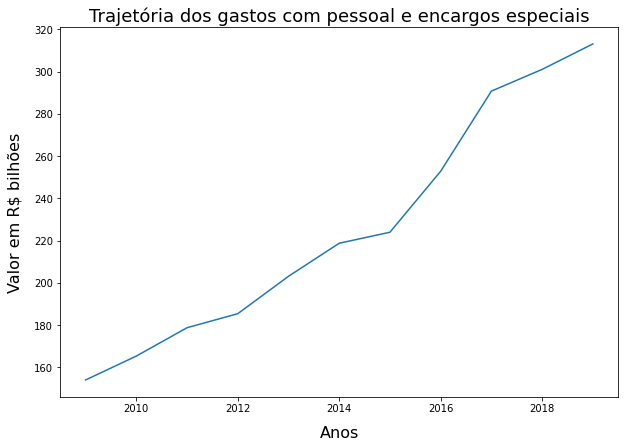

In [34]:
x= df_valores_reais.Ano[12:23]
x2= df_valores_reais.Ano
y1= (df_valores_reais.Despesa_pessoal[12:23]).apply(divisor)
y2= (df_valores_reais.Despesa_pessoal/ df_valores_reais.Receita_liquida)

figura= plt.figure(figsize=(10,6.8))
plt.plot(x, y1)
plt.ylabel('Valor em R$ bilhões', labelpad= 12, fontsize= 16)
plt.xlabel('Anos', labelpad= 12, fontsize= 16)
plt.title('Trajetória dos gastos com pessoal e encargos especiais', fontsize= 18)
 
plt.show()

**Como vemos no gráfico, os gastos com essa categoria praticamente dobraram nos ultimos dez anos. O resultado foram duas reformas muito impopulares em um curto espaço de tempo, de modo a conter os gastos governamentais.**

**Outro efeito negativo que deficits primários podem acarretar são as crescentes dividas do governo com o pagamento de juros, pois quando há superavits primários, ou seja, despesas correntes menores que as receitas, essa economia é usada para o pagamento desse tipo de dívida. A seguir vamos observar um gráfico que mostra a trajetória dos resultados primários e dos resultados nominais, ou seja, o tamanho da divida financeiro do país**

In [35]:
#lendo o arquivo que está em formato xlsx
df = pd.read_excel("/content/resultados nominais.xlsx")
df.tail(30)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
4,NaN,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,R$ Milhões,NaN,NaN,NaN,NaN,NaN,NaN
5,I. RECEITA TOTAL,159012,183516,209384,235052,270441,320056,356132,418993,487822,542810,618352,715616,738125,918531,988270,1.05989e+06,1.17898e+06,1.22147e+06,1.24779e+06,1.31495e+06,1.38308e+06,1.48424e+06,1.63511e+06,NaN,NaN,NaN,NaN,NaN,NaN
6,II. TRANSF. POR REPARTIÇÃO DE RECEITA,24243.6,27156.3,30539.4,36697.7,43060.9,52018.2,56929.1,64041.2,80223.5,90323.4,101917,127359,119679,133370,163036,171394,181895,198462,204684,226835,228335,256724,288331,NaN,NaN,NaN,NaN,NaN,NaN
7,III. RECEITA LÍQUIDA (I-II),134769,156360,178844,198354,227380,268038,299202,354952,407599,452487,516435,588257,618446,785161,825234,888495,997088,1.02301e+06,1.04311e+06,1.08812e+06,1.15475e+06,1.22751e+06,1.34678e+06,NaN,NaN,NaN,NaN,NaN,NaN
8,IV. DESPESA TOTAL,132968,148783,158680,177372,205643,236461,260122,305611,354925,403738,458785,502574,579009,707270,733343,815907,924929,1.0465e+06,1.16446e+06,1.24939e+06,1.27901e+06,1.35176e+06,1.44184e+06,NaN,NaN,NaN,NaN,NaN,NaN
9,V. FUNDO SOBERANO DO BRASIL,0,0,0,0,0,0,0,0,0,0,0,-14244,0,0,0,12400,0,0,855,0,0,4020.98,0,NaN,NaN,NaN,NaN,NaN,NaN
10,VI. PRIMÁRIO GOVERNO CENTRAL,1800.75,7577.02,20164.3,20982.2,21737.1,31577.2,39080,49341.4,52673.2,48748.2,57650.4,71438.4,39436.4,77891.2,91891,84988,72159.1,-23482.4,-120502,-161276,-124261,-120221,-95064.7,NaN,NaN,NaN,NaN,NaN,NaN
11,VII.1 AJUSTE METODOLÓGICO ITAIPU 2,0,0,0,0,0,0,0,2634.32,2399.69,2590.54,1787.72,1229.16,1373.06,1357.89,1137.9,1313.76,858.412,0,3888.43,3721.92,4461.69,4908.01,5371.65,NaN,NaN,NaN,NaN,NaN,NaN
12,VII.2 AJUSTE METODOLÓGICO CAIXA-COMPETÊNCIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,161.7,3115.65,1713.89,1388.86,NaN,NaN,NaN,NaN,NaN,NaN
13,VIII. DISCREPÂNCIA ESTATÍSTICA,-4176.26,-2535.51,2507.8,-551.604,242.705,341.893,-336.164,409.44,668.505,12.7979,0.61109,-1359.63,1633.73,-525.802,6.56487,-215.75,2273.15,3010.7,-41.7882,-2081.35,-1758.05,-2567.99,-594.669,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#apagando as linhas desnecessárias
df = df.drop([0,1,2,4,9,11,12,13,14,15,19,
              17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33], axis= 0)

#apagando colunas desnessárias, que possuem campos NaN
df = df.dropna(axis= 1, how= 'all')

#alterando o cabeçalho dos dados, que recebera a primeira linha do DF, os anos de observação.
df.columns = df.iloc[0]
df = df[1:]

#mudando o indexador dos dados para simplificar a localização de cada um nas iterações.
index = ['receita_total','transferencias','receita_liquida','despesa_total','resultado_primario','resultado_nominal']
df.index = index
#dropando a coluna discriminação, que de certa forma se tornou o indexador de maneira mais simplificada.
df= df.drop(['Discriminação'], axis = 1)
df.head(10)

df.head(10)

3,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
receita_total,159012,183516,209384,235052,270441,320056,356132,418993,487822,542810,618352,715616,738125,918531,988270,1.05989e+06,1.17898e+06,1.22147e+06,1.24779e+06,1.31495e+06,1.38308e+06,1.48424e+06,1.63511e+06
transferencias,24243.6,27156.3,30539.4,36697.7,43060.9,52018.2,56929.1,64041.2,80223.5,90323.4,101917,127359,119679,133370,163036,171394,181895,198462,204684,226835,228335,256724,288331
receita_liquida,134769,156360,178844,198354,227380,268038,299202,354952,407599,452487,516435,588257,618446,785161,825234,888495,997088,1.02301e+06,1.04311e+06,1.08812e+06,1.15475e+06,1.22751e+06,1.34678e+06
despesa_total,132968,148783,158680,177372,205643,236461,260122,305611,354925,403738,458785,502574,579009,707270,733343,815907,924929,1.0465e+06,1.16446e+06,1.24939e+06,1.27901e+06,1.35176e+06,1.44184e+06
resultado_primario,1800.75,7577.02,20164.3,20982.2,21737.1,31577.2,39080,49341.4,52673.2,48748.2,57650.4,71438.4,39436.4,77891.2,91891,84988,72159.1,-23482.4,-120502,-161276,-124261,-120221,-95064.7
resultado_nominal,-21307,-45100,-26336,-25016.4,-25273.2,-10029.2,-62152.5,-27033.3,-73284,-74475,-59607,-24890.8,-107363,-45785.5,-87517.6,-61181.7,-110555,-271542,-513896,-477835,-459349,-426474,-399014


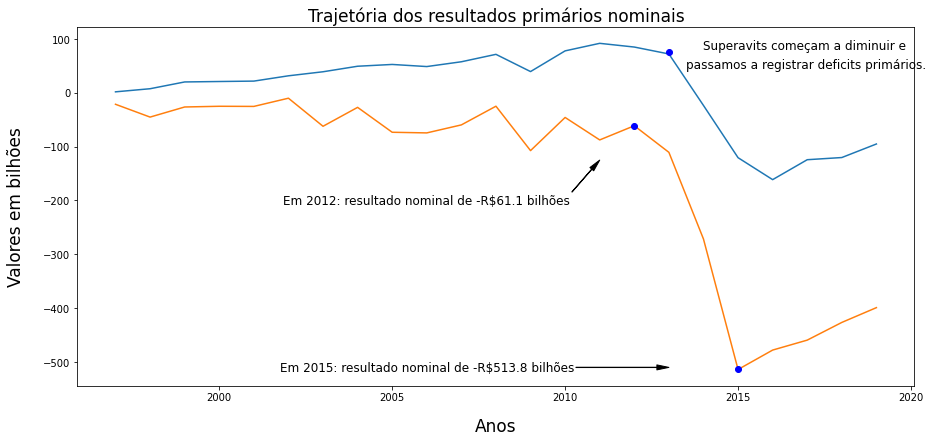

In [108]:
y1= df.iloc[4]/1000
y2= df.iloc[5]/1000
x= [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
    2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

fig= plt.figure(figsize= (15,6.6))
fig= plt.plot(x,y1, label= 'Resultado primário')
plt.plot(2013, 75, 'bo' )
t=plt.text(2014, 80, "Superavits começam a diminuir e ", fontname='Arial', size=12)
t=plt.text(2013.5,45, "passamos a registrar deficits primários.", size=12, fontname= 'Arial')

fig= plt.plot(x,y2, label= 'Resultado nominal')
plt.plot(2012, -61, 'bo')
plt.plot(2015, -513, 'bo')
#t= plt.text(2010,-200, "Aqui", size= 12)
plt.annotate("Em 2012: resultado nominal de -R$61.1 bilhões", (2011.0,-125.0), xytext=(2006.0,-200.0), 
             fontsize= 12, fontname= 'Arial', ha='center', va= 'center',
             arrowprops= dict(color='black', width=0.3, headwidth= 5 ))
plt.annotate("Em 2015: resultado nominal de -R$513.8 bilhões", (2013,-510), xytext=(2006,-510), fontsize=12,
             fontname= 'Arial', ha= 'center', va='center', arrowprops= dict(color='black', width=0.3, headwidth= 5))


plt.ylabel('Valores em bilhões', labelpad= 18, fontsize= 17)
plt.xlabel('Anos', labelpad= 15, fontsize= 17)
plt.title('Trajetória dos resultados primários nominais', fontsize= 17)

plt.show()




**Como vemos anteriormente, a partir do ano de 2014 começamos a registrar deficits primários, e como o resultado nominal (linha amarela) é o resultado da diferença entre o resultado primário (linha azul) e as despesas com os juros e correções da dívida pública, os deficits no resultado primário (linha azul), fizeram com que o deficit no resultado nominal se elevasse muito em um curto periodo de tempo (linha amarela), assim como observado no gráfico.**

**Nos próximos códigos vamos analisar o comportamento demográfico da nossa sociedade, um dos principais indicadores de que reformas seriam necessárias para a sustentabilidade fiscal do Estado no longo prazo.**

In [ ]:
df= pd.read_csv('/content/demografia brasileira por idade.csv', error_bad_lines= False, header= None, encoding= 'latin-1')
df.head()

In [ ]:
df= pd.read_csv('/content/demografia brasileira por idade.csv', error_bad_lines= False, encoding= 'latin-1', 
                names= ['Faixa Etária', '1980', '1990', '2000', '2010','2020'], sep= ';')
df.head(30)

In [ ]:
df.columns= ['faixa_etaria','anos_80','anos_90','anos_2000','anos_2010','anos_2020']

In [ ]:
df= df.drop([0,1,2,3,4,17,18,19,20,21,22,23,24,25,26,27,28], axis= 0)

df.head(15)


In [ ]:
df.dtypes

In [ ]:
df.faixa_etaria= df.faixa_etaria.str.replace(' ', '_')
df.faixa_etaria

In [ ]:
df.anos_80= df.anos_80.astype(int)
df.anos_90= df.anos_90.str.replace('-','0')
df['anos_90']= df['anos_90'].apply(int)
df.anos_2000= df.anos_2000.astype(int)
df.anos_2010= df.anos_2010.astype(int)
df.anos_2020= df.anos_2020.astype(int)

In [ ]:
df.head(30)

In [ ]:
df_piramide= pd.DataFrame(columns=['faixa_etaria','anos_80_neg','anos_80_pos',
                                   'anos_2020_neg','anos_2020_pos'])

df_piramide.faixa_etaria= df.faixa_etaria[0:11]
df_piramide.anos_80_neg= (df.anos_80[0:11])*(-1)
df_piramide.anos_80_pos= df.anos_80[0:11]
df_piramide.anos_2020_neg= (df.anos_2020[0:11])*(-1)
df_piramide.anos_2020_pos= df.anos_2020[0:11]
df_piramide.head(20)

In [ ]:
df_piramide.dtypes

In [ ]:
df_piramide.faixa_etaria= df_piramide.faixa_etaria.str.replace('_anos','')

In [ ]:
fig = plt.figure(figsize= (18, 6))
fig.subplots_adjust(wspace = 0.5)
plt.title= ('piramide populacional')

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

bar_plot = sb.barplot(x="anos_80_neg", y="faixa_etaria", color="blue", 
                      data = df_piramide, order =['80_e_mais','70_a_79','60_a_69','50_a_59',
                                                  '40_a_49','30_a_39','20_a_29','15_a_19','10_a_14','5_a_9','1_a_4'], ax= ax1)

bar_plot = sb.barplot(x="anos_80_pos",y="faixa_etaria", color="blue", 
                       data = df_piramide, order = ['80_e_mais','70_a_79','60_a_69','50_a_59',
                                                  '40_a_49','30_a_39','20_a_29','15_a_19','10_a_14','5_a_9','1_a_4'], ax= ax1)

bar_plot= sb.barplot(x="anos_2020_neg", y= 'faixa_etaria', color="blue", 
                       data = df_piramide, order =['80_e_mais','70_a_79','60_a_69','50_a_59',
                                                  '40_a_49','30_a_39','20_a_29','15_a_19','10_a_14','5_a_9','1_a_4'], ax= ax2)

bar_plot= sb.barplot(x= "anos_2020_pos", y= "faixa_etaria", color="blue", 
                       data = df_piramide, order = ['80_e_mais','70_a_79','60_a_69','50_a_59',
                                                  '40_a_49','30_a_39','20_a_29','15_a_19','10_a_14','5_a_9','1_a_4'], ax= ax2)






A piramide demográfica da esquerda se refere a estimativa da população dos anos 80; a direita temos a mesma estimativa para a população em 2020. Devemos reparar, principalmente, como a partir do meio da pirâmide ela vai se alargando, tendendo a um estrutura em que teremos uma base bem mais fina que a parte do meio para o topo da pirâmide, o que significa o "envelhecimento" da população. Isso também reflete, claro, uma menor taxa de fecundidade das famílias; se antes tinhamos familias com uma média de tres crianças em casa, hoje temos uma média bem menor. Enfim, nós cansamos de estudar isso em geografia no colégio. O problema de fato foi IGNORADO. Com estimativas como estas cada vez mais precisas conseguimos montar a mesma piramide para daqui 20, 30 ou até 40 anos...

Vamos agora incluir os dados que contem todas as receitas e despesas do governo federal, de modo a analisar o resultado nominal do governo, isto é, a diferença entre as receitas totais do governo, incluindo as financeiras, e as despesas totais do governo, incluindo as despesas financeiras. Lembrando que o Brasil, assim como qualquer país subdesenvolvido, mais toma emprestimos que concede, e se a economia começa a apresentar crescentes deficits primários, o governo não consegue pagar os juros dessas dividas, o que deteriora ainda mais a situação fiscal. 